<a href="https://colab.research.google.com/github/yasinsoylu1997/NLP-PROJELER-TOPLU/blob/main/Text_Sentiment_Analysis2_and_Glove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
dataset = pd.read_csv('sample.csv')
data=dataset[["yildizSayisi","yorum"]]
data = data.sample(frac=1).reset_index(drop=True)
data=data[:5000]

In [12]:
dataset

,yildizSayisi,yorum,yorumLike
0,1,İlk ürünüm sorunsuz geldi lakin bunda prize ta...,0
1,1,Ürünü teslim aldığım günün ertesi iade için ka...,7
2,1,kesinlikle beğenmedim kullanmaya başladıktan 1...,2
3,1,Merhaba ürün elime ulaştı ama ürün bir çalışıy...,1
4,1,kargo hızlı o konuda haksızlık yapamam ama ürü...,2
...,...,...,...
49995,5,Çok güzel çok beğendim tafsiye ederim,0
49996,5,Vallahi çok işime yaradı. Aylarda öyle boşuna ...,0
49997,5,"olması gerektigi gibi , kenarda hazırda beklem...",0
49998,5,arçelik bulaşık makinesi için aldım servis olm...,0


In [13]:
dataset = pd.read_csv('sample.csv')
def sentiments(df):
  if df['yildizSayisi'] > 3.9:
    return 'Positive'
  elif df['yildizSayisi'] <= 3.0:
    return 'Negative'
data['sentiment'] = data.apply(sentiments, axis=1)

In [14]:
data

,yildizSayisi,yorum,sentiment
0,2,Hiç beğenmedim çünkü hemen pişiriyo ve telveni...,Negative
1,4,Gayet güzel ve kullanişlı ben beğendim,Positive
2,2,ürün ilk geldiğinde cok sağlam gibi duruyor ki...,Negative
3,1,su damlatıyor ve soğutucu funktion çalışmıyor,Negative
4,4,4 sipariş vermiştim en son kargoya çıkan ızgar...,Positive
...,...,...,...
4995,1,Sakın almayın ilk kullanmada elimde kaldı !!!!!!,Negative
4996,5,İki takım sipariş verdim. Biri çamaşır makine ...,Positive
4997,3,Paketleme o kadar Özensizdiki elime kırık geçt...,Negative
4998,5,Uygun fiyat yüksek kalite. Gercekten memnun ka...,Positive


In [15]:
data["sentiment"].unique()

array(['Negative', 'Positive'], dtype=object)

In [16]:
data=data[["yorum","sentiment"]]

In [17]:
labeling = {
    'Positive':1, 
    'Negative':0
}

data['sentiment'] = data['sentiment'].apply(lambda x : labeling[x])
# Output first ten rows
data.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,yorum,sentiment
0,Hiç beğenmedim çünkü hemen pişiriyo ve telveni...,0
1,Gayet güzel ve kullanişlı ben beğendim,1
2,ürün ilk geldiğinde cok sağlam gibi duruyor ki...,0
3,su damlatıyor ve soğutucu funktion çalışmıyor,0
4,4 sipariş vermiştim en son kargoya çıkan ızgar...,1
5,Eh işte idare eder biraz telmaşa telefonu koyd...,0
6,çok kaliteli ve güzel çıktı,1
7,Fiyat olarak uygundu o nedenle aldım evim stüd...,1
8,Ağzı çok ince kulağımı acityor takarken malese...,0
9,biraz küçük ama çok güzel pişiriyor,1


In [18]:
from sklearn.model_selection import train_test_split

train_df , valid_df  = train_test_split(data, test_size=0.2, random_state=42)

In [19]:
train_df , test_df   = train_test_split(train_df, test_size=0.2, random_state=42)

In [20]:
# Turnig all text to lowercase
train_df['yorum'] = train_df['yorum'].str.lower()
valid_df['yorum'] = valid_df['yorum'].str.lower()
test_df['yorum'] = test_df['yorum'].str.lower()
train_df.head()

,yorum,sentiment
3444,düzleştiricisi işe yaramıyor saçı çekiyor ve k...,0
2063,anlatıldığı kadar işe yarar bir ürün değil.,0
3714,xiaomi marka mi emin olamadim,0
2671,fişe taktığım anda tüm şalterleri attırdı hata...,0
2154,bu üçüncü mini fanım çabuk bozuluyorlar ama gü...,1


In [21]:
# Removing ponctuation
import string

exclude = set(string.punctuation) 

def remove_punctuation(x): 
    try: 
        x = ''.join(ch for ch in x if ch not in exclude) 
    except: 
        pass 
    return x 

train_df['yorum'] = train_df['yorum'].apply(remove_punctuation)
valid_df['yorum'] = valid_df['yorum'].apply(remove_punctuation)
test_df['yorum'] = test_df['yorum'].apply(remove_punctuation)
train_df.head()

,yorum,sentiment
3444,düzleştiricisi işe yaramıyor saçı çekiyor ve k...,0
2063,anlatıldığı kadar işe yarar bir ürün değil,0
3714,xiaomi marka mi emin olamadim,0
2671,fişe taktığım anda tüm şalterleri attırdı hata...,0
2154,bu üçüncü mini fanım çabuk bozuluyorlar ama gü...,1


In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# Removing stopwords
from nltk.corpus import stopwords

stop = stopwords.words('turkish')

train_df['yorum'] = train_df['yorum'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
valid_df['yorum'] = valid_df['yorum'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test_df['yorum'] = test_df['yorum'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
train_df.head()

,yorum,sentiment
3444,düzleştiricisi işe yaramıyor saçı çekiyor kopa...,0
2063,anlatıldığı kadar işe yarar bir ürün değil,0
3714,xiaomi marka mi emin olamadim,0
2671,fişe taktığım anda şalterleri attırdı hatalı ürün,0
2154,üçüncü mini fanım çabuk bozuluyorlar günü kurt...,1


# Classical Model with TF-IDF and SVM¶


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create feature vectors for every sentence
vectorizer = TfidfVectorizer(#min_df = 5,
                             #max_df = 0.8,
                             max_features = 20000,
                             sublinear_tf = True,
                             use_idf = True)#, stop_words='english')#vocabulary = list(embeddings_index.keys()

train_vectors = vectorizer.fit_transform(train_df['yorum'])
valid_vectors = vectorizer.transform(valid_df['yorum'])
test_vectors = vectorizer.transform(test_df['yorum'])

In [25]:
data

,yorum,sentiment
0,Hiç beğenmedim çünkü hemen pişiriyo ve telveni...,0
1,Gayet güzel ve kullanişlı ben beğendim,1
2,ürün ilk geldiğinde cok sağlam gibi duruyor ki...,0
3,su damlatıyor ve soğutucu funktion çalışmıyor,0
4,4 sipariş vermiştim en son kargoya çıkan ızgar...,1
...,...,...
4995,Sakın almayın ilk kullanmada elimde kaldı !!!!!!,0
4996,İki takım sipariş verdim. Biri çamaşır makine ...,1
4997,Paketleme o kadar Özensizdiki elime kırık geçt...,0
4998,Uygun fiyat yüksek kalite. Gercekten memnun ka...,1


In [26]:
from sklearn import svm
# SVM
classifier_linear = svm.SVC(kernel='linear')
#Train
classifier_linear.fit(train_vectors, train_df['sentiment'])

SVC(kernel='linear')

In [27]:
from sklearn.metrics import classification_report

predictions = classifier_linear.predict(test_vectors)
# results
report = classification_report(test_df['sentiment'], predictions)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       478
           1       0.77      0.69      0.73       322

    accuracy                           0.79       800
   macro avg       0.78      0.77      0.78       800
weighted avg       0.79      0.79      0.79       800



# Changing the classifier by a NN model¶


In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Defining the NN model
model = Sequential()
model.add(Dense(20, input_shape=(train_vectors.shape[1],), activation='relu'))
model.add(Dropout(0.3))
#model.add(Dense(5, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# Train
#Salvar o melhor modelo
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

history = model.fit(
    train_vectors.toarray(), train_df['sentiment'], 
    epochs=20, 
    verbose=1,
    callbacks = callbacks_list,
    validation_data=(valid_vectors.toarray(), valid_df['sentiment']))

Epoch 1/20
 99/100 [============================>.] - ETA: 0s - loss: 0.6675 - accuracy: 0.6102
Epoch 00001: val_loss improved from inf to 0.62537, saving model to model.h5
100/100 [==============================] - 3s 8ms/step - loss: 0.6676 - accuracy: 0.6094 - val_loss: 0.6254 - val_accuracy: 0.6750
Epoch 2/20
 89/100 [=========================>....] - ETA: 0s - loss: 0.5840 - accuracy: 0.7223
Epoch 00002: val_loss improved from 0.62537 to 0.54392, saving model to model.h5
100/100 [==============================] - 0s 5ms/step - loss: 0.5801 - accuracy: 0.7241 - val_loss: 0.5439 - val_accuracy: 0.7550
Epoch 3/20
 92/100 [==========================>...] - ETA: 0s - loss: 0.4754 - accuracy: 0.8281
Epoch 00003: val_loss improved from 0.54392 to 0.48308, saving model to model.h5
100/100 [==============================] - 1s 6ms/step - loss: 0.4726 - accuracy: 0.8272 - val_loss: 0.4831 - val_accuracy: 0.8020
Epoch 4/20
 92/100 [==========================>...] - ETA: 0s - loss: 0.3819 - a

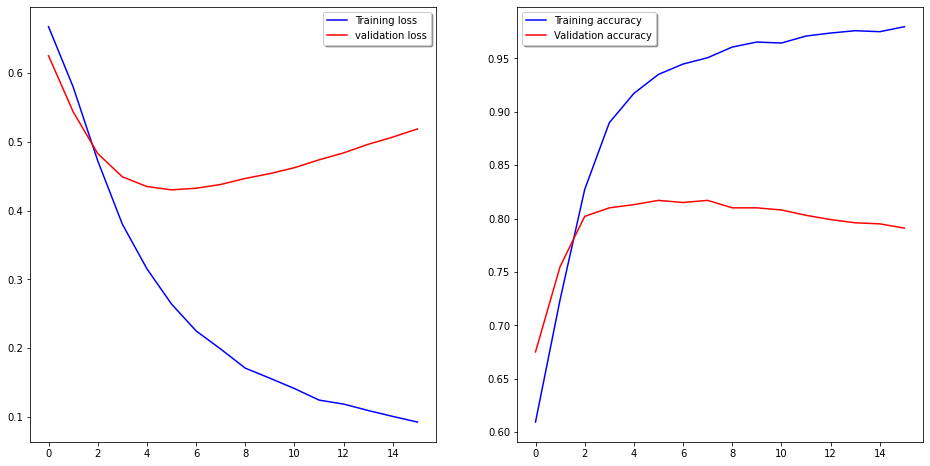

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [31]:
from tensorflow.keras.models import load_model
# Load the best saved model
model = load_model('model.h5')

y_pred = model.predict(valid_vectors.toarray())
y_pred = np.round(y_pred).astype(int)

print(classification_report(valid_df['sentiment'], y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       622
           1       0.78      0.71      0.75       378

    accuracy                           0.82      1000
   macro avg       0.81      0.80      0.80      1000
weighted avg       0.82      0.82      0.82      1000



#3. Sentences as stream of words¶


In [32]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import string

# Model constants.
max_features = 20000
embedding_dim = 100
sequence_length = 500

# function to stardardize texts
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    #stripped_html = tf.strings.regex_replace(lowercase, "<br />", " ")
    #return tf.strings.regex_replace(
    #    stripped_html, "[%s]" % re.escape(string.punctuation), ""
    #)
    return lowercase

# normalize, split, and map strings to integers
vectorize_layer = TextVectorization(
    #standardize=custom_standardization,
    max_tokens=max_features,
    output_mode="int",
    output_sequence_length=sequence_length,
)

# Creating the vocabulary
vectorize_layer.adapt(train_df['yorum'].values)

In [33]:
# Vetorizing all the texts
def vectorize_text(text):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text)


# Vectorize the data.
train_ds = vectorize_text(train_df['yorum'])
valid_ds = vectorize_text(valid_df['yorum'])
test_ds = vectorize_text(test_df[ 'yorum'])

In [34]:
print(train_df['yorum'][1])


gayet güzel kullanişlı ben beğendim


In [35]:
print(train_ds[1])
print(vectorize_text(['ürünü yaklaşık 3 aydır kullanıyorum ergonomik tasarımı yüksek hassasiyeti süper bir mouse bir masadan parke zemine dusurmeme rağmen performansindan bir kaybetmedi yorumları okuduğunuzda göre ürünü satın almayı planlıyorsunuz kaçırmayın alın']))

tf.Tensor(
[877  30 105 559   2   3   7   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0

# A Convolutional Model

In [36]:
from keras import layers

model = Sequential()
# A integer input for vocab indices.
model.add(layers.Input(shape=(None,), dtype="int64"))
# Layer to map those vocab indices into a space of dimensionality 'embedding_dim'.
model.add(layers.Embedding(max_features, embedding_dim))
# Conv1D + global max pooling
model.add(layers.Conv1D(50, 7, padding="valid", activation="relu", strides=3))#200
#model.add(layers.Conv1D(100, 7, padding="valid", activation="relu", strides=3))
model.add(layers.GlobalMaxPooling1D())

# Common hidden layer for final classification
model.add(layers.Dense(10, activation="relu"))#100
model.add(layers.Dropout(0.5))
# Single unit output layer with sigmoid activation
model.add(layers.Dense(1, activation="sigmoid", name="predictions"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
# Train
#Salvar o melhor modelo
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1)
]

history = model.fit(
    train_ds, train_df['sentiment'], 
    epochs=20, 
    verbose=1,
    callbacks = callbacks_list,
    validation_data=(valid_ds, valid_df['sentiment']))

Epoch 1/20
 98/100 [============================>.] - ETA: 0s - loss: 0.6736 - accuracy: 0.5963
Epoch 00001: val_loss improved from inf to 0.63517, saving model to model.h5
100/100 [==============================] - 9s 14ms/step - loss: 0.6728 - accuracy: 0.5969 - val_loss: 0.6352 - val_accuracy: 0.7160
Epoch 2/20
 95/100 [===========================>..] - ETA: 0s - loss: 0.5277 - accuracy: 0.7766
Epoch 00002: val_loss improved from 0.63517 to 0.43879, saving model to model.h5
100/100 [==============================] - 1s 11ms/step - loss: 0.5244 - accuracy: 0.7809 - val_loss: 0.4388 - val_accuracy: 0.8100
Epoch 3/20
 99/100 [============================>.] - ETA: 0s - loss: 0.3019 - accuracy: 0.9028
Epoch 00003: val_loss did not improve from 0.43879
100/100 [==============================] - 1s 10ms/step - loss: 0.3025 - accuracy: 0.9025 - val_loss: 0.4712 - val_accuracy: 0.7860
Epoch 4/20
 97/100 [============================>.] - ETA: 0s - loss: 0.1823 - accuracy: 0.9494
Epoch 00004

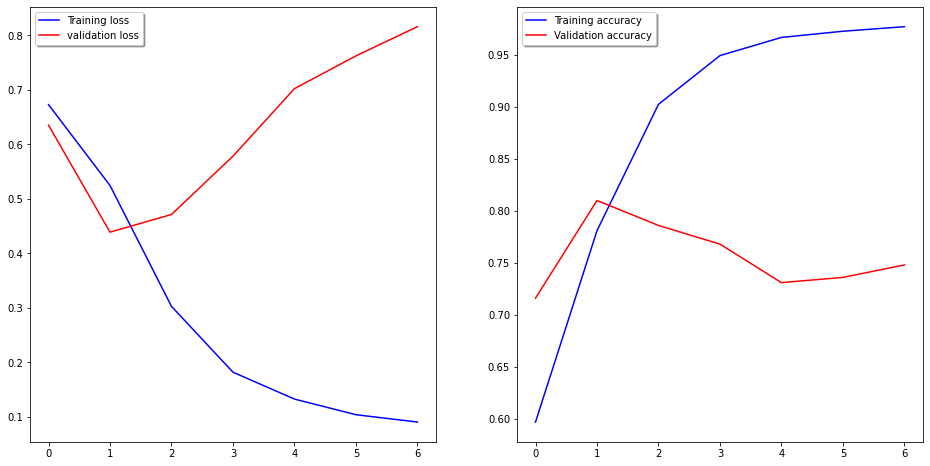

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [39]:
model = load_model('model.h5')

y_pred = model.predict(valid_vectors.toarray())
y_pred = np.round(y_pred).astype(int)

print(classification_report(valid_df['sentiment'], y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       622
           1       0.00      0.00      0.00       378

    accuracy                           0.62      1000
   macro avg       0.31      0.50      0.38      1000
weighted avg       0.39      0.62      0.48      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# A LSTM Recursive Model¶


In [40]:
model = Sequential()
# Input for variable-length sequences of integers
model.add(keras.Input(shape=(None,), dtype="int64"))
# Embed each integer in a embedding_dim vector
model.add(layers.Embedding(max_features, embedding_dim))
# Add 2 bidirectional LSTMs
#model.add(layers.Bidirectional(layers.LSTM(32, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(32)))
# Add a classifier
model.add(layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
# Train
#Salvar o melhor modelo
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1)
]

history = model.fit(
    train_ds, train_df['sentiment'], 
    epochs=20, 
    verbose=1,
    callbacks = callbacks_list,
    validation_data=(valid_ds, valid_df['sentiment']))

Epoch 1/20
100/100 [==============================] - ETA: 0s - loss: 0.6075 - accuracy: 0.6712
Epoch 00001: val_loss improved from inf to 0.47507, saving model to model.h5
100/100 [==============================] - 28s 241ms/step - loss: 0.6075 - accuracy: 0.6712 - val_loss: 0.4751 - val_accuracy: 0.7990
Epoch 2/20
100/100 [==============================] - ETA: 0s - loss: 0.3332 - accuracy: 0.8700
Epoch 00002: val_loss improved from 0.47507 to 0.44585, saving model to model.h5
100/100 [==============================] - 23s 229ms/step - loss: 0.3332 - accuracy: 0.8700 - val_loss: 0.4458 - val_accuracy: 0.8040
Epoch 3/20
100/100 [==============================] - ETA: 0s - loss: 0.1798 - accuracy: 0.9378
Epoch 00003: val_loss did not improve from 0.44585
100/100 [==============================] - 23s 228ms/step - loss: 0.1798 - accuracy: 0.9378 - val_loss: 0.6247 - val_accuracy: 0.7620
Epoch 4/20
100/100 [==============================] - ETA: 0s - loss: 0.1141 - accuracy: 0.9647
Epoch

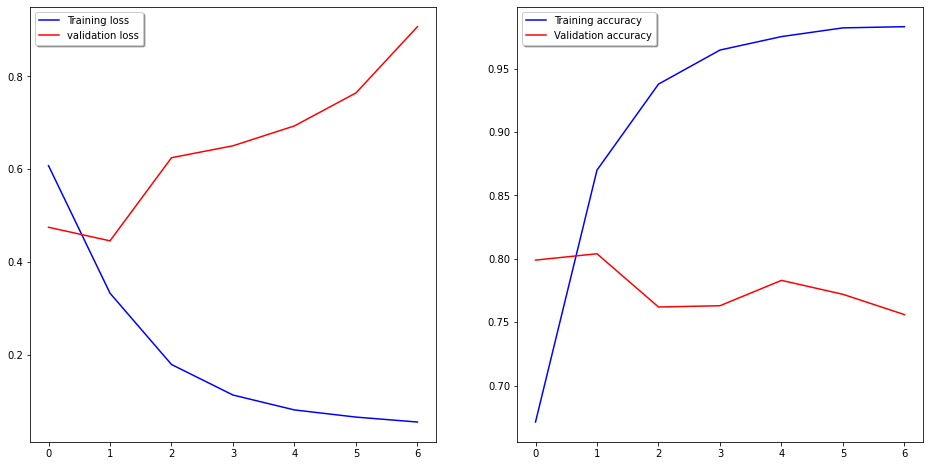

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [43]:
model = load_model('model.h5')

y_pred = model.predict(valid_vectors.toarray())
y_pred = np.round(y_pred).astype(int)

print(classification_report(valid_df['sentiment'], y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       622
           1       0.00      0.00      0.00       378

    accuracy                           0.62      1000
   macro avg       0.31      0.50      0.38      1000
weighted avg       0.39      0.62      0.48      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4. Using Word Embeddings¶


In [44]:
voc = vectorize_layer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [45]:
word_index


{'': 0,
 '[UNK]': 1,
 'bir': 2,
 'ürün': 3,
 'güzel': 4,
 'iyi': 5,
 'geldi': 6,
 'değil': 7,
 'iade': 8,
 'gayet': 9,
 'tavsiye': 10,
 'aldım': 11,
 'yok': 12,
 'biraz': 13,
 'fakat': 14,
 'ürünü': 15,
 'hızlı': 16,
 'memnun': 17,
 'bi': 18,
 'cok': 19,
 'ederim': 20,
 'kargo': 21,
 'var': 22,
 'sonra': 23,
 'ben': 24,
 'göre': 25,
 'tam': 26,
 'olarak': 27,
 'küçük': 28,
 'kullanışlı': 29,
 'kadar': 30,
 'ses': 31,
 'fazla': 32,
 'sadece': 33,
 'oldu': 34,
 'kaliteli': 35,
 'bile': 36,
 '1': 37,
 'hemen': 38,
 'uygun': 39,
 'urun': 40,
 'teşekkürler': 41,
 'ürünün': 42,
 'ettim': 43,
 'büyük': 44,
 '2': 45,
 'uzun': 46,
 'kötü': 47,
 'ilk': 48,
 'sorun': 49,
 'ince': 50,
 'elime': 51,
 'ancak': 52,
 'kesinlikle': 53,
 'beğendim': 54,
 'saç': 55,
 'ulaştı': 56,
 'bozuldu': 57,
 'almayın': 58,
 'onun': 59,
 'guzel': 60,
 'aynı': 61,
 'çabuk': 62,
 'fiyatına': 63,
 'şarj': 64,
 'kalitesi': 65,
 'şekilde': 66,
 'dışında': 67,
 'beğenmedim': 68,
 'gün': 69,
 'tek': 70,
 'kısa': 71,
 'pek'

In [50]:
test = ["güzel",  "kargo", "para","berbat"]
[word_index[w] for w in test]

[4, 21, 198, 210]

# Glove Embeddings¶


In [51]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-12-09 22:49:29--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-12-09 22:49:30--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-12-09 22:49:30--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [52]:
!ls


glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip  sample.csv
glove.6B.200d.txt  glove.6B.50d.txt   model.h5	    sample_data


In [53]:
embeddings_index = {}
with open("glove.6B.100d.txt") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [54]:
embeddings_index["cat"]


array([ 0.23088  ,  0.28283  ,  0.6318   , -0.59411  , -0.58599  ,
        0.63255  ,  0.24402  , -0.14108  ,  0.060815 , -0.7898   ,
       -0.29102  ,  0.14287  ,  0.72274  ,  0.20428  ,  0.1407   ,
        0.98757  ,  0.52533  ,  0.097456 ,  0.8822   ,  0.51221  ,
        0.40204  ,  0.21169  , -0.013109 , -0.71616  ,  0.55387  ,
        1.1452   , -0.88044  , -0.50216  , -0.22814  ,  0.023885 ,
        0.1072   ,  0.083739 ,  0.55015  ,  0.58479  ,  0.75816  ,
        0.45706  , -0.28001  ,  0.25225  ,  0.68965  , -0.60972  ,
        0.19578  ,  0.044209 , -0.31136  , -0.68826  , -0.22721  ,
        0.46185  , -0.77162  ,  0.10208  ,  0.55636  ,  0.067417 ,
       -0.57207  ,  0.23735  ,  0.4717   ,  0.82765  , -0.29263  ,
       -1.3422   , -0.099277 ,  0.28139  ,  0.41604  ,  0.10583  ,
        0.62203  ,  0.89496  , -0.23446  ,  0.51349  ,  0.99379  ,
        1.1846   , -0.16364  ,  0.20653  ,  0.73854  ,  0.24059  ,
       -0.96473  ,  0.13481  , -0.0072484,  0.33016  , -0.1236

In [55]:
num_tokens = len(voc) + 2
#embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix to be used in a Embedding layer
# matrix where entry at index i is the pre-trained vector for the word of index i in our vectorizer's vocabulary
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 912 words (9078 misses)


In [56]:
embeddings_index["guzel"]


array([ 0.5084   ,  0.505    , -0.081128 , -0.21552  ,  0.01673  ,
       -0.74883  , -0.037463 , -0.33809  ,  0.18696  ,  0.41353  ,
        0.51614  ,  0.32128  ,  0.020276 , -0.17554  , -0.095284 ,
        0.23546  , -0.54258  ,  0.43615  ,  0.28495  , -0.10936  ,
       -0.22726  ,  0.51345  , -0.12641  ,  1.0597   ,  0.18203  ,
        0.5659   ,  0.57652  ,  0.21145  ,  0.40707  , -0.12156  ,
        0.12677  , -0.29595  ,  0.39932  , -0.011487 , -0.099267 ,
       -0.34029  ,  0.35489  ,  0.17766  ,  0.055194 , -0.11279  ,
        0.45247  ,  0.16822  ,  0.88978  ,  0.049971 , -0.39325  ,
       -0.37352  ,  0.12689  ,  0.5073   ,  0.54952  ,  0.57672  ,
       -0.0089012, -0.41126  , -0.17227  , -0.20782  ,  0.12585  ,
        0.76335  ,  0.32022  , -0.1332   , -0.66609  , -0.56915  ,
        0.023227 , -0.33429  ,  1.1368   , -0.41956  ,  0.094599 ,
       -0.22115  , -0.072964 , -0.46117  , -0.47633  ,  0.2042   ,
        0.0048466,  0.15403  ,  0.30478  ,  0.87446  , -0.0300

In [57]:
word_index["guzel"]


60

In [58]:
embedding_matrix[216]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


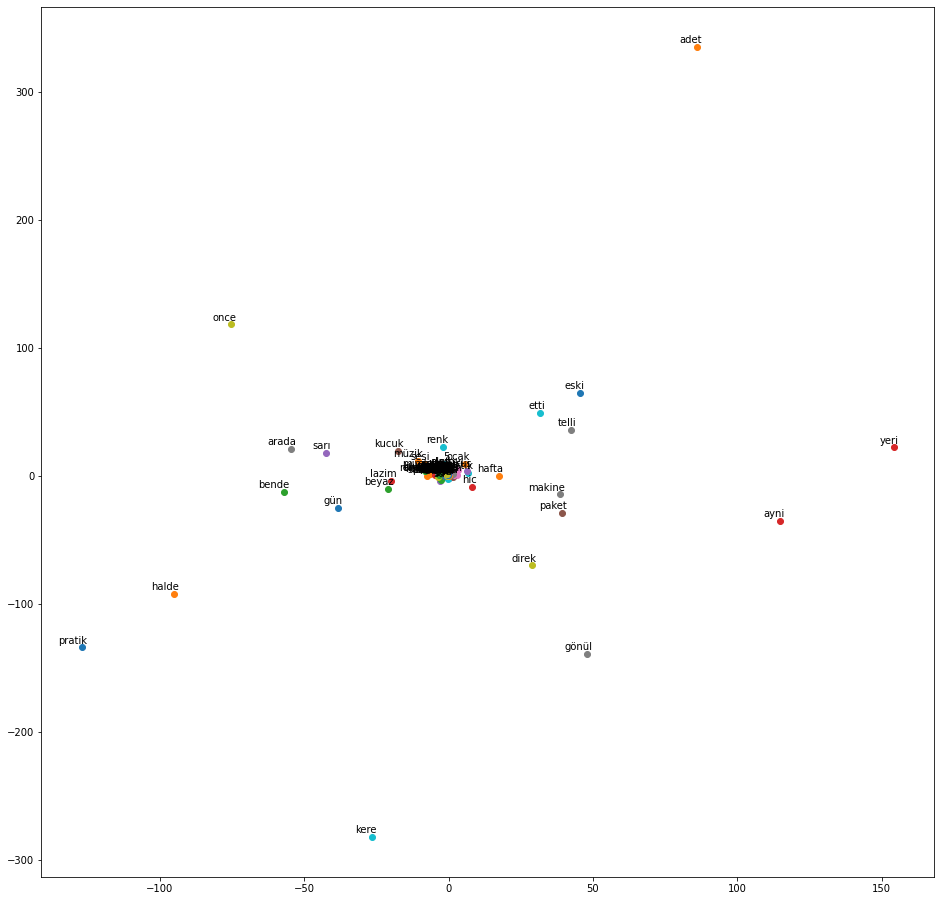

In [59]:
# Visualizing with T-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline


max_w = 1000
# Creates and TSNE model and plots it
labels = []
tokens = []
for word, i in word_index.items():
    if i == max_w:
        break
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        tokens.append(embedding_vector)
        labels.append(word)
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=250, random_state=23)
new_values = tsne_model.fit_transform(tokens)
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
plt.figure(figsize=(16, 16))
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
        xy=(x[i], y[i]),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom')
plt.show()

In [60]:
# load the pre-trained word embeddings matrix into an Embedding layer. trainable = False
embedding_layer = layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [61]:
model = Sequential()
# Input for variable-length sequences of integers
model.add(keras.Input(shape=(None,), dtype="int64"))
# load the pre-trained word embeddings matrix into an Embedding layer. trainable = False
model.add(layers.Embedding(num_tokens,embedding_dim, embeddings_initializer=keras.initializers.Constant(embedding_matrix), trainable=False))
# Add 2 bidirectional LSTMs
model.add(layers.Bidirectional(layers.LSTM(32, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(32)))
# Add a classifier
model.add(layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [62]:
# Train
#Salvar o melhor modelo
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1)
]

history = model.fit(
    train_ds, train_df['sentiment'], 
    epochs=2, 
    verbose=1,
    callbacks = callbacks_list,
    validation_data=(valid_ds, valid_df['sentiment']))

Epoch 1/2
100/100 [==============================] - ETA: 0s - loss: 0.6627 - accuracy: 0.5972
Epoch 00001: val_loss improved from inf to 0.65578, saving model to model.h5
100/100 [==============================] - 56s 502ms/step - loss: 0.6627 - accuracy: 0.5972 - val_loss: 0.6558 - val_accuracy: 0.6200
Epoch 2/2
100/100 [==============================] - ETA: 0s - loss: 0.6378 - accuracy: 0.6172
Epoch 00002: val_loss improved from 0.65578 to 0.64721, saving model to model.h5
100/100 [==============================] - 48s 481ms/step - loss: 0.6378 - accuracy: 0.6172 - val_loss: 0.6472 - val_accuracy: 0.6100


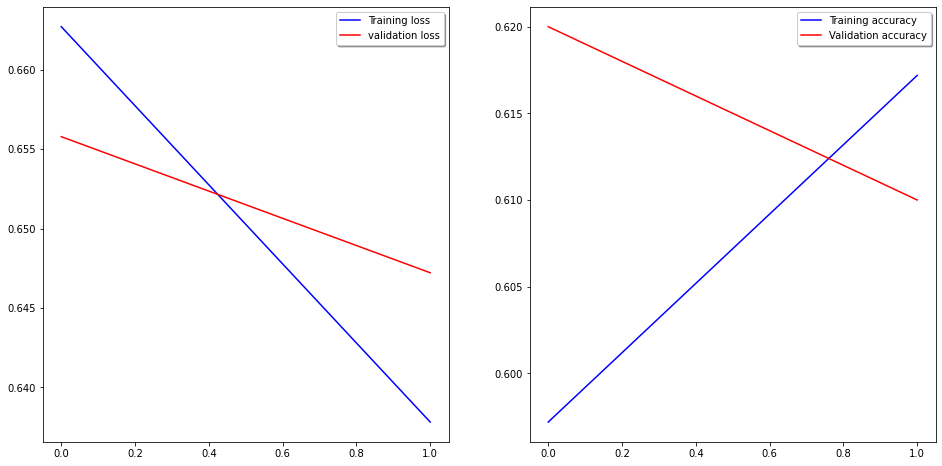

In [63]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [64]:
model = load_model('model.h5')

y_pred = model.predict(test_ds)
y_pred = [1 if x >=0.5 else 0 for x in y_pred]
print(classification_report(test_df['sentiment'], y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       478
           1       0.51      0.51      0.51       322

    accuracy                           0.60       800
   macro avg       0.59      0.59      0.59       800
weighted avg       0.60      0.60      0.60       800



# Using a Transformer¶


In [72]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, name=None, **kwargs):
        super(TransformerBlock, self).__init__(name=name)
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.ff_dim = ff_dim
        self.rate = rate
        super(TransformerBlock, self).__init__(**kwargs)
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
    
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'embed_dim': self.embed_dim,
            'num_heads': self.num_heads,
            'ff_dim': self.ff_dim,
            'rate': self.rate,
        })
        return config

In [73]:
#Two seperate embedding layers, one for tokens, one for token index (positions).
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim, name=None, **kwargs):
        super(TokenAndPositionEmbedding, self).__init__(name=name)
        self.maxlen = maxlen
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        super(TokenAndPositionEmbedding, self).__init__(**kwargs)
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions
    
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'maxlen': self.maxlen,
            'vocab_size': self.vocab_size,
            'embed_dim': self.embed_dim
        })
        return config

In [74]:
import keras
import keras.utils
from keras import utils as np_utils
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import layers 
import keras.backend as K
from keras.layers import LSTM, Input



In [75]:
max_features = 20000
embedding_dim = 100
sequence_length = 500

embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(sequence_length,))
embedding_layer = TokenAndPositionEmbedding(sequence_length, max_features, embedding_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embedding_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
#model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [76]:
# Train
#Salvar o melhor modelo
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1)
]

history = model.fit(
    train_ds, train_df['sentiment'], 
    epochs=2, 
    verbose=1,
    callbacks = callbacks_list,
    validation_data=(valid_ds, valid_df['sentiment'])
)

Epoch 1/2
100/100 [==============================] - ETA: 0s - loss: 0.6852 - accuracy: 0.5897
Epoch 00001: val_loss improved from inf to 0.66771, saving model to model.h5
100/100 [==============================] - 9s 74ms/step - loss: 0.6852 - accuracy: 0.5897 - val_loss: 0.6677 - val_accuracy: 0.6220
Epoch 2/2
100/100 [==============================] - ETA: 0s - loss: 0.6765 - accuracy: 0.5997
Epoch 00002: val_loss did not improve from 0.66771
100/100 [==============================] - 7s 69ms/step - loss: 0.6765 - accuracy: 0.5997 - val_loss: 0.6711 - val_accuracy: 0.6220


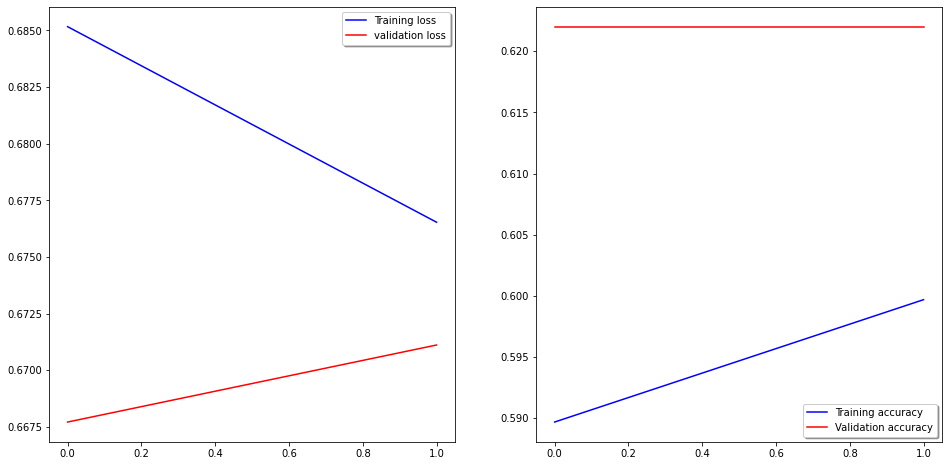

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [78]:
model = load_model('model.h5', custom_objects={'TokenAndPositionEmbedding': TokenAndPositionEmbedding, 'TransformerBlock': TransformerBlock })

y_pred = model.predict(test_ds)
y_pred = [1 if x >=0.5 else 0 for x in y_pred]
print(classification_report(test_df['sentiment'], y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       478
           1       0.00      0.00      0.00       322

    accuracy                           0.60       800
   macro avg       0.30      0.50      0.37       800
weighted avg       0.36      0.60      0.45       800



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
